## Contents  
- Import  
- Trim df to only contain numerical variables  
- Elbow technique  
- k-means clustering

### Import libraries and data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [4]:
from sklearn import impute

In [5]:
%matplotlib inline

In [6]:
path = r"C:\Users\Kieran\Documents\Career Foundry\Data Immersion\6.0 Advanced Analyics & Dashboard Design"

In [7]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_Flags_3.csv'))

In [8]:
df.shape

(72096, 23)

In [9]:
df.head()

,iso_code,continent,location,date,new_cases_smoothed_per_million,total_deaths_per_million,hosp_patients_per_million,people_vaccinated_per_hundred,handwashing_facilities,human_development_index,...,aged_70_older,aged_65_older,population_density,population,median_age,cardiovasc_death_rate,diabetes_prevalence,extreme_poverty,stringency_category,aged_over_65
0,AFG,Asia,Afghanistan,24/02/2020,NaN,NaN,NaN,NaN,37.746,0.511,...,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,NaN,low stringency,< 5%
1,AFG,Asia,Afghanistan,25/02/2020,NaN,NaN,NaN,NaN,37.746,0.511,...,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,NaN,low stringency,< 5%
2,AFG,Asia,Afghanistan,26/02/2020,NaN,NaN,NaN,NaN,37.746,0.511,...,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,NaN,low stringency,< 5%
3,AFG,Asia,Afghanistan,27/02/2020,NaN,NaN,NaN,NaN,37.746,0.511,...,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,NaN,low stringency,< 5%
4,AFG,Asia,Afghanistan,28/02/2020,NaN,NaN,NaN,NaN,37.746,0.511,...,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,NaN,low stringency,< 5%


In [10]:
df.columns

Index(['iso_code', 'continent', 'location', 'date',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'hosp_patients_per_million', 'people_vaccinated_per_hundred',
       'handwashing_facilities', 'human_development_index', 'life_expectancy',
       'stringency_index', 'gdp_per_capita', 'aged_70_older', 'aged_65_older',
       'population_density', 'population', 'median_age',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'extreme_poverty',
       'stringency_category', 'aged_over_65'],
      dtype='object')

## Trim df to only contain numerical variables

In [11]:
df_trim = df[['new_cases_smoothed_per_million', 'total_deaths_per_million', 'hosp_patients_per_million', 'people_vaccinated_per_hundred', 'life_expectancy', 'gdp_per_capita', 'aged_70_older', 'aged_65_older',
       'population_density', 'population', 'median_age',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'extreme_poverty']]

In [12]:
df_trim.replace([np.inf, -np.inf], np.nan)

,new_cases_smoothed_per_million,total_deaths_per_million,hosp_patients_per_million,people_vaccinated_per_hundred,life_expectancy,gdp_per_capita,aged_70_older,aged_65_older,population_density,population,median_age,cardiovasc_death_rate,diabetes_prevalence,extreme_poverty
0,NaN,NaN,NaN,NaN,64.83,1803.987,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,NaN
1,NaN,NaN,NaN,NaN,64.83,1803.987,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,NaN
2,NaN,NaN,NaN,NaN,64.83,1803.987,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,NaN
3,NaN,NaN,NaN,NaN,64.83,1803.987,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,NaN
4,NaN,NaN,NaN,NaN,64.83,1803.987,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72091,4.335,98.096,NaN,0.07,61.49,1899.775,1.882,2.822,42.729,14862927.0,19.6,307.846,1.82,21.4
72092,3.210,98.433,NaN,0.08,61.49,1899.775,1.882,2.822,42.729,14862927.0,19.6,307.846,1.82,21.4
72093,2.787,98.433,NaN,0.11,61.49,1899.775,1.882,2.822,42.729,14862927.0,19.6,307.846,1.82,21.4
72094,2.816,98.433,NaN,0.13,61.49,1899.775,1.882,2.822,42.729,14862927.0,19.6,307.846,1.82,21.4


In [13]:
df_trim.fillna(0)

,new_cases_smoothed_per_million,total_deaths_per_million,hosp_patients_per_million,people_vaccinated_per_hundred,life_expectancy,gdp_per_capita,aged_70_older,aged_65_older,population_density,population,median_age,cardiovasc_death_rate,diabetes_prevalence,extreme_poverty
0,0.000,0.000,0.0,0.00,64.83,1803.987,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,0.0
1,0.000,0.000,0.0,0.00,64.83,1803.987,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,0.0
2,0.000,0.000,0.0,0.00,64.83,1803.987,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,0.0
3,0.000,0.000,0.0,0.00,64.83,1803.987,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,0.0
4,0.000,0.000,0.0,0.00,64.83,1803.987,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72091,4.335,98.096,0.0,0.07,61.49,1899.775,1.882,2.822,42.729,14862927.0,19.6,307.846,1.82,21.4
72092,3.210,98.433,0.0,0.08,61.49,1899.775,1.882,2.822,42.729,14862927.0,19.6,307.846,1.82,21.4
72093,2.787,98.433,0.0,0.11,61.49,1899.775,1.882,2.822,42.729,14862927.0,19.6,307.846,1.82,21.4
72094,2.816,98.433,0.0,0.13,61.49,1899.775,1.882,2.822,42.729,14862927.0,19.6,307.846,1.82,21.4


In [14]:
# checking for nan values

np.any(np.isnan(df_trim))

True

Still showing nan values despite using fillna(0). I will try using numpy to replace nan values instead.

In [15]:
df_trim.replace(np.nan, 0)

,new_cases_smoothed_per_million,total_deaths_per_million,hosp_patients_per_million,people_vaccinated_per_hundred,life_expectancy,gdp_per_capita,aged_70_older,aged_65_older,population_density,population,median_age,cardiovasc_death_rate,diabetes_prevalence,extreme_poverty
0,0.000,0.000,0.0,0.00,64.83,1803.987,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,0.0
1,0.000,0.000,0.0,0.00,64.83,1803.987,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,0.0
2,0.000,0.000,0.0,0.00,64.83,1803.987,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,0.0
3,0.000,0.000,0.0,0.00,64.83,1803.987,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,0.0
4,0.000,0.000,0.0,0.00,64.83,1803.987,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72091,4.335,98.096,0.0,0.07,61.49,1899.775,1.882,2.822,42.729,14862927.0,19.6,307.846,1.82,21.4
72092,3.210,98.433,0.0,0.08,61.49,1899.775,1.882,2.822,42.729,14862927.0,19.6,307.846,1.82,21.4
72093,2.787,98.433,0.0,0.11,61.49,1899.775,1.882,2.822,42.729,14862927.0,19.6,307.846,1.82,21.4
72094,2.816,98.433,0.0,0.13,61.49,1899.775,1.882,2.822,42.729,14862927.0,19.6,307.846,1.82,21.4


In [16]:
df_trim.dtypes

new_cases_smoothed_per_million    float64
total_deaths_per_million          float64
hosp_patients_per_million         float64
people_vaccinated_per_hundred     float64
life_expectancy                   float64
gdp_per_capita                    float64
aged_70_older                     float64
aged_65_older                     float64
population_density                float64
population                        float64
median_age                        float64
cardiovasc_death_rate             float64
diabetes_prevalence               float64
extreme_poverty                   float64
dtype: object

In [17]:
np.any(np.isnan(df_trim))

True

In [18]:
#checking for infinity values

np.all(np.isfinite(df_trim))

False

## elbow technique

In [19]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [20]:
score = [kmeans[i].fit(df_trim).score(df_trim) for i in range(len(kmeans))]
score

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Value error soloution

I keep getting value errors when running the clustering because of nan values. Trying to resolve.

In [23]:
np.nan_to_num(df_trim)

array([[  0.   ,   0.   ,   0.   , ..., 597.029,   9.59 ,   0.   ],
       [  0.   ,   0.   ,   0.   , ..., 597.029,   9.59 ,   0.   ],
       [  0.   ,   0.   ,   0.   , ..., 597.029,   9.59 ,   0.   ],
       ...,
       [  2.787,  98.433,   0.   , ..., 307.846,   1.82 ,  21.4  ],
       [  2.816,  98.433,   0.   , ..., 307.846,   1.82 ,  21.4  ],
       [  2.432,  98.769,   0.   , ..., 307.846,   1.82 ,  21.4  ]])

In [25]:
np.isnan(df_trim)

,new_cases_smoothed_per_million,total_deaths_per_million,hosp_patients_per_million,people_vaccinated_per_hundred,life_expectancy,gdp_per_capita,aged_70_older,aged_65_older,population_density,population,median_age,cardiovasc_death_rate,diabetes_prevalence,extreme_poverty
0,True,True,True,True,False,False,False,False,False,False,False,False,False,True
1,True,True,True,True,False,False,False,False,False,False,False,False,False,True
2,True,True,True,True,False,False,False,False,False,False,False,False,False,True
3,True,True,True,True,False,False,False,False,False,False,False,False,False,True
4,True,True,True,True,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72091,False,False,True,False,False,False,False,False,False,False,False,False,False,False
72092,False,False,True,False,False,False,False,False,False,False,False,False,False,False
72093,False,False,True,False,False,False,False,False,False,False,False,False,False,False
72094,False,False,True,False,False,False,False,False,False,False,False,False,False,False


### Solution:

In [29]:
#new df replacing the nan values with 0's

df_trim_2 = df_trim.fillna(0)

In [30]:
#checking nans are removed

np.isnan(df_trim_2)

,new_cases_smoothed_per_million,total_deaths_per_million,hosp_patients_per_million,people_vaccinated_per_hundred,life_expectancy,gdp_per_capita,aged_70_older,aged_65_older,population_density,population,median_age,cardiovasc_death_rate,diabetes_prevalence,extreme_poverty
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72091,False,False,False,False,False,False,False,False,False,False,False,False,False,False
72092,False,False,False,False,False,False,False,False,False,False,False,False,False,False
72093,False,False,False,False,False,False,False,False,False,False,False,False,False,False
72094,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### elbow technique second attempt

In [31]:
score = [kmeans[i].fit(df_trim_2).score(df_trim_2) for i in range(len(kmeans))]
score

[-3.510475217447165e+22,
 -4.757671659910398e+21,
 -2.5580201689524947e+21,
 -5.423923284553495e+20,
 -1.632552967536494e+20,
 -7.796952260876619e+19,
 -4.4433090362097025e+19,
 -2.7760698015358865e+19,
 -1.8000060065335376e+19]

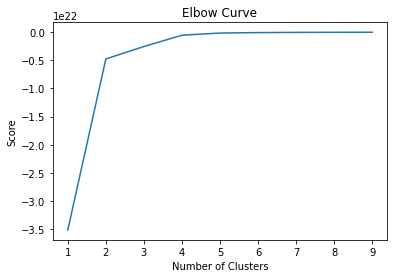

In [32]:
# plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Optimal count for clusters is 4.

### k-means cluserting

In [33]:
# kmeans object

kmeans = KMeans(n_clusters = 4)

In [34]:
# fit the kmeans object to the data

kmeans.fit(df_trim_2)

KMeans(n_clusters=4)

In [55]:
# add clusters column to df

df_trim_2['clusters'] = kmeans.fit_predict(df_trim_2)

In [56]:
df_trim_2.head()

,new_cases_smoothed_per_million,total_deaths_per_million,hosp_patients_per_million,people_vaccinated_per_hundred,life_expectancy,gdp_per_capita,aged_70_older,aged_65_older,population_density,population,median_age,cardiovasc_death_rate,diabetes_prevalence,extreme_poverty,clusters
0,0.0,0.0,0.0,0.0,64.83,1803.987,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,0.0,1
1,0.0,0.0,0.0,0.0,64.83,1803.987,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,0.0,1
2,0.0,0.0,0.0,0.0,64.83,1803.987,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,0.0,1
3,0.0,0.0,0.0,0.0,64.83,1803.987,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,0.0,1
4,0.0,0.0,0.0,0.0,64.83,1803.987,1.337,2.581,54.422,38928341.0,18.6,597.029,9.59,0.0,1


In [57]:
df_trim_2['clusters'].value_counts()

1    69697
3     1589
2      405
0      405
Name: clusters, dtype: int64

### Visualisations

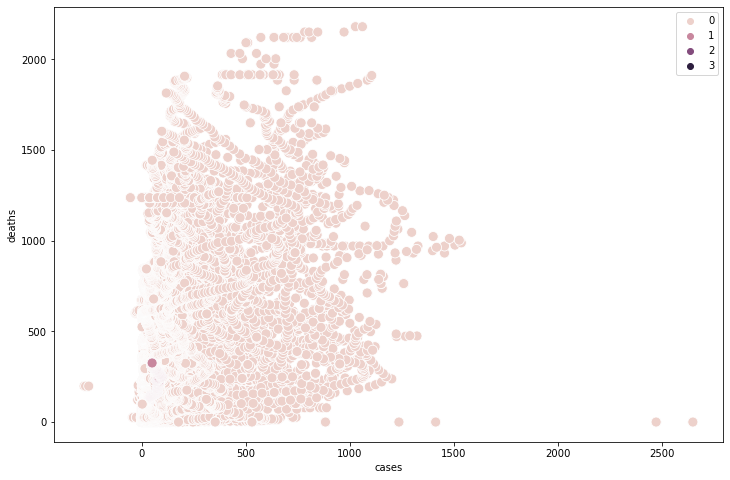

In [38]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_trim_2['new_cases_smoothed_per_million'], y=df_trim_2['total_deaths_per_million'], hue=kmeans.labels_, s=100)
ax.grid(False) # This removes the grid from the background.
plt.xlabel('cases') 
plt.ylabel('deaths')
plt.show()

This shows me that the cluserting algorithm has not identified clusters based on these variables, as they are nearly all in the same clusters.

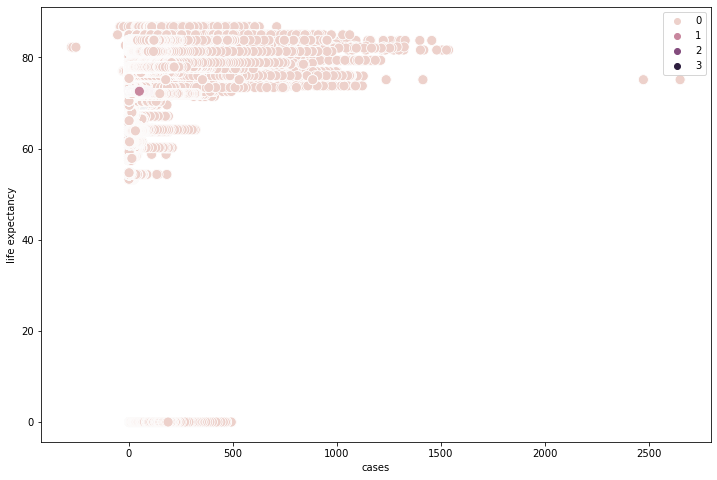

In [39]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_trim_2['new_cases_smoothed_per_million'], y=df_trim_2['life_expectancy'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('cases') 
plt.ylabel('life expectancy')
plt.show()

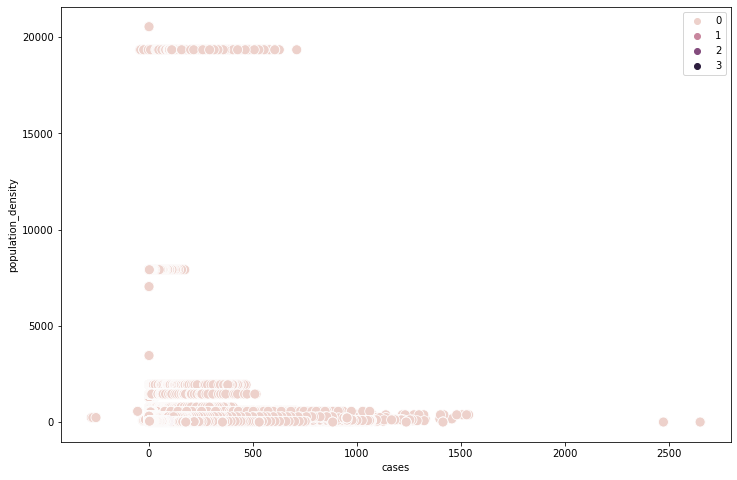

In [41]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_trim_2['new_cases_smoothed_per_million'], y=df_trim_2['population_density'], hue=kmeans.labels_, s=100)
ax.grid(False) # This removes the grid from the background.
plt.xlabel('cases') 
plt.ylabel('population_density')
plt.show()

Because I have lots of zero values, most of the observations are being clustered in to one group. This means the clustering is not very helpful for my analysis. 

In [58]:
df_trim_2.loc[df_trim_2['clusters'] == 2, 'cluster'] = 'purple'
df_trim_2.loc[df_trim_2['clusters'] == 1, 'cluster'] = 'dark pink'
df_trim_2.loc[df_trim_2['clusters'] == 3, 'cluster'] = 'dark purple'
df_trim_2.loc[df_trim_2['clusters'] == 0, 'cluster'] = 'pink'

In [59]:
df_trim_2.groupby('clusters').agg({'new_cases_smoothed_per_million':['mean', 'median'], 
                         'total_deaths_per_million':['mean', 'median'], 
                         'population_density':['mean', 'median'],
                          'gdp_per_capita':['mean', 'median']})

new_cases_smoothed_per_million         total_deaths_per_million  \
                                   mean  median                     mean   
clusters                                                                   
0                             35.647630  32.919               112.863993   
1                             63.903692   6.999               148.450069   
2                             12.800642  15.096                32.338037   
3                             35.525287   7.616               107.432216   

                 population_density          gdp_per_capita             
          median               mean   median           mean     median  
clusters                                                                
0         94.715          58.045000   58.045   15469.207000  15469.207  
1         17.955         312.591238   80.291   17839.579194  11188.744  
2         24.289           0.000000    0.000       0.000000      0.000  
3         14.682         150.172632  147.674    5507.500276   6426.674

Most of these results are not particularly helpful because of how much bigger one cluster is compared to the others. 